In [1]:
library(nlme)
library(ggplot2)
library(lme4)
library(MASS)
library(car)
library(lattice)
library(scales)

Loading required package: Matrix

Attaching package: ‘lme4’

The following object is masked from ‘package:nlme’:

    lmList



In [1]:
tab <- read.csv("metabolite_table.csv")

In [2]:
head(tab)

molecule,Patient,Sample,Depth,Treat,hydroxyphenazine,pyocyanin,Phenazine.1.carboxylic.acid,PCN,Pyochelin,⋯,Rha694,Rha696,Rha665,Rha724,Rha679,Rha696.1,Ampicillin,Rha522Na,Rha527Na,Rha673Na
34_NT1_GA1_01_31949.mzML,34,NT1,1,NT,4.176439,5.389959,5.236144,4.045166,5.825348,⋯,5.146426,5.794736,4.263589,4.886333,5.341435,5.667733,6.276865,5.778895,3.484585,5.471949
34_NT2_GA2_01_31950.mzML,34,NT2,2,NT,4.065953,5.337268,5.497400,3.637890,5.770828,⋯,4.660979,5.065057,3.896967,3.683767,4.544068,4.237242,6.158797,5.337140,4.632255,5.260501
34_NT3_GA3_01_31951.mzML,34,NT3,3,NT,4.095239,4.537466,4.897935,2.301030,5.209300,⋯,3.713323,3.401401,3.129690,2.301030,3.389520,3.566791,6.283087,4.271284,3.555820,4.546296
34_NT4_GA4_01_31952.mzML,34,NT4,4,NT,4.044069,4.467579,5.032183,2.996512,5.302608,⋯,3.317227,3.380934,3.194237,2.719331,3.028571,3.155943,6.293492,3.991758,3.534026,4.319647
34_NT5_GA5_01_31953.mzML,34,NT5,5,NT,3.929215,4.255273,4.974254,2.907411,5.227280,⋯,3.254306,3.397940,3.000000,2.565848,3.303628,3.490801,6.262687,3.891649,3.093422,4.036469
34_NT6_GA6_01_31954.mzML,34,NT6,6,NT,3.955399,3.689486,4.744293,2.301030,4.929460,⋯,2.602060,3.344785,2.829947,2.301030,3.245513,2.561101,6.282252,3.698970,2.623249,3.636287


In [4]:
# Inform the index of Patient, Depth and pseudomonas counts 
# in this order
#'pseudo' names the metabolite column. Use pseudo everytime so I don't have to change it everywhere
tab2 <- tab[, c(2,4,31)]
colnames(tab2)[3] <- "pseudo"

In [5]:
tab3 <- tab2
tab3$pseudo <- tab3$pseudo+1

In [6]:
head(tab3)

Patient,Depth,pseudo
34,1,7.809274
34,2,7.802590
34,3,7.306332
34,4,7.529746
34,5,7.528973
34,6,7.226301


In [7]:
tab3$Patient <- as.factor(tab3$Patient)

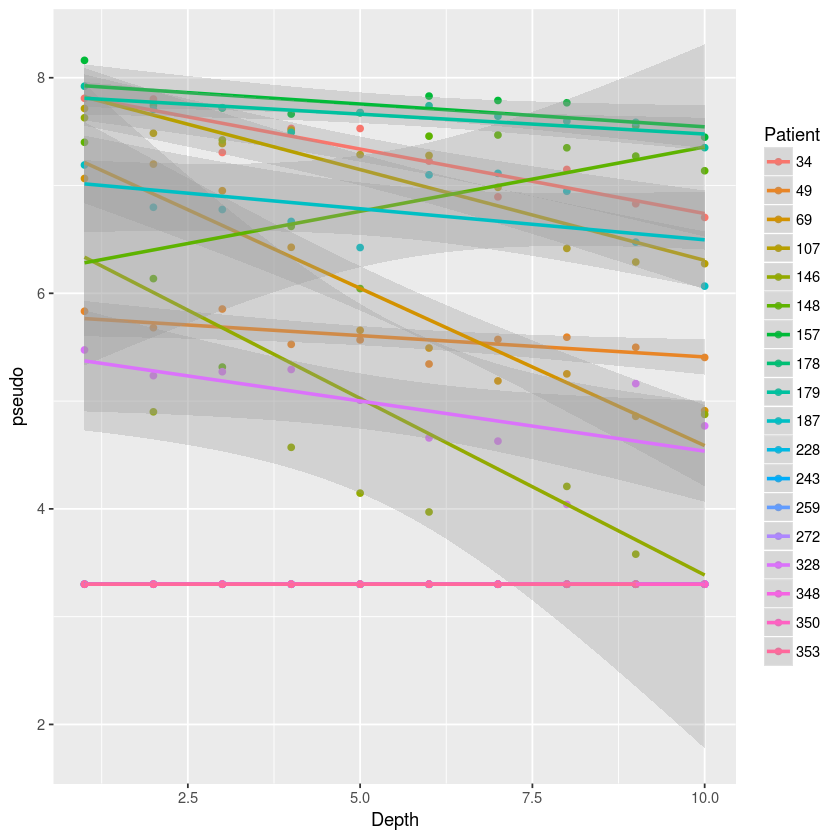

In [9]:
ggplot(tab3,aes(x=Depth,y=pseudo,colour=Patient))+geom_point()+
    geom_smooth(method="lm",alpha=0.3)

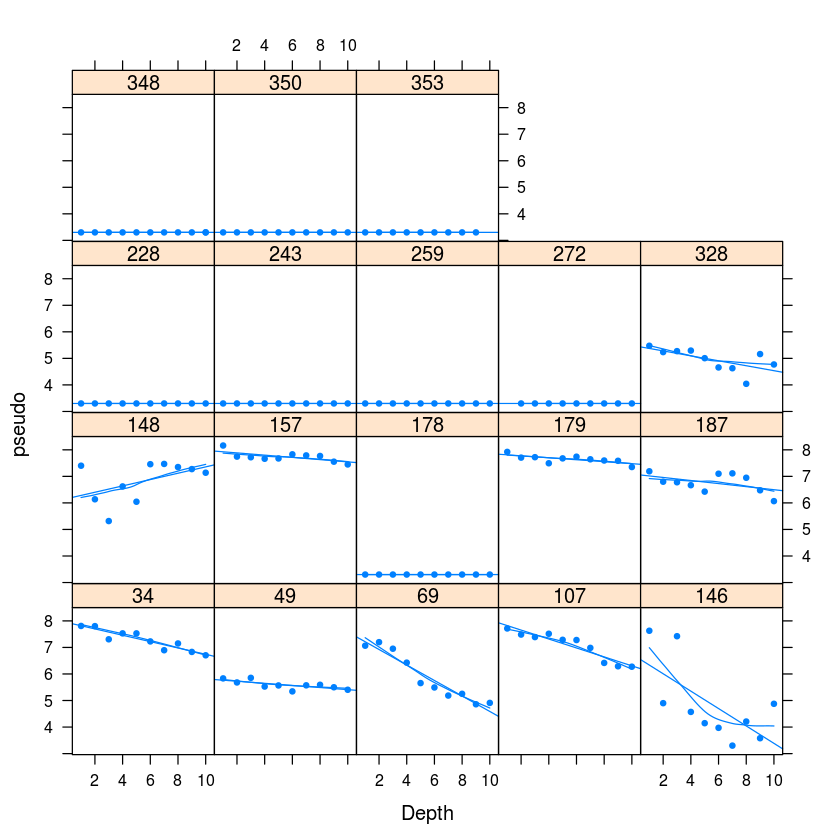

In [10]:
xyplot(pseudo ~ Depth | Patient, data=tab3, type=c("p", "r", "smooth"), , auto.key = TRUE,  span=1, pch=20)

We want to fit a linear mixed-effects model, to assign a random effect to indiviual, as data were gathered over time
on the same individuals. 

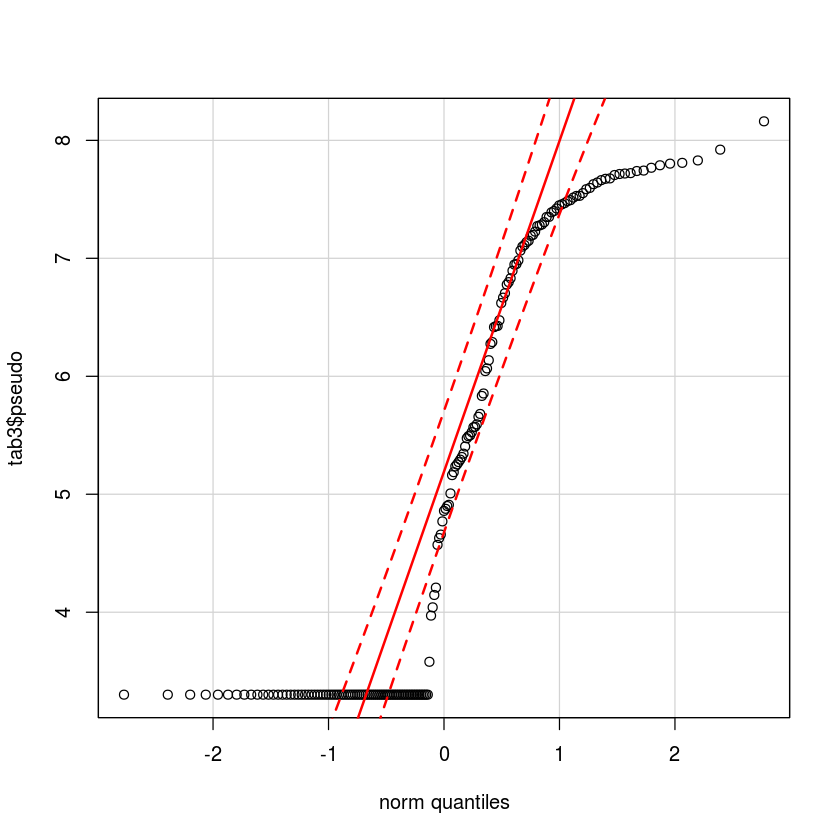

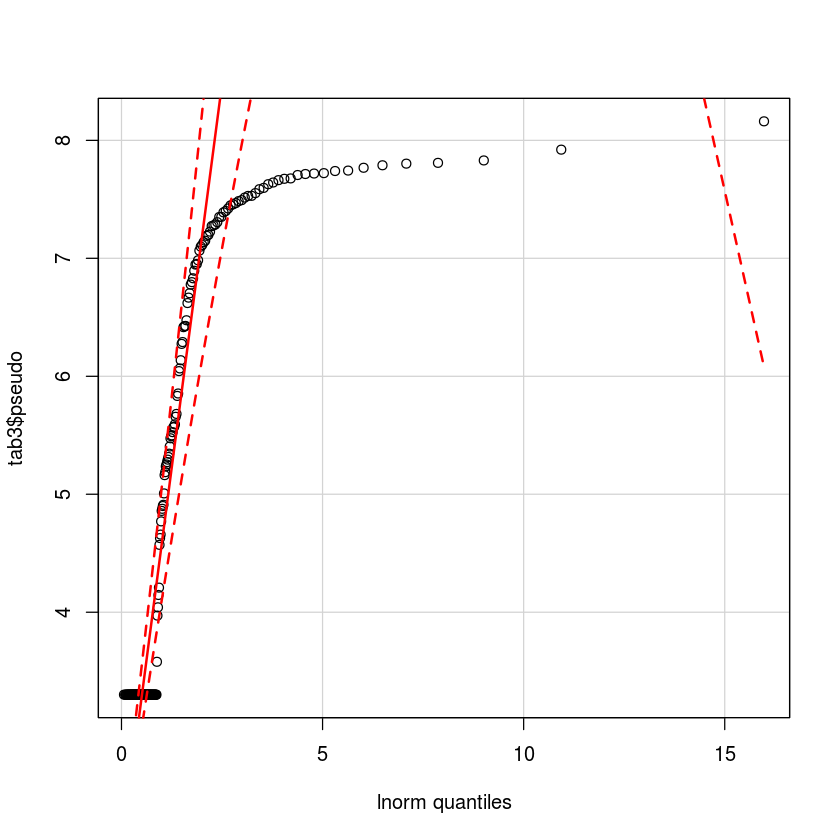

In [12]:
qqp(tab3$pseudo, "norm")
qqp(tab3$pseudo, "lnorm")

In [13]:
lmme <- lme(pseudo ~ Depth, data = tab3, random = ~ 1 | Patient, method = "ML" )
summary( lmme )

Linear mixed-effects model fit by maximum likelihood
 Data: tab3 
       AIC      BIC    logLik
  332.8396 345.5891 -162.4198

Random effects:
 Formula: ~1 | Patient
        (Intercept)  Residual
StdDev:    1.732756 0.4681415

Fixed effects: pseudo ~ Depth 
                Value Std.Error  DF   t-value p-value
(Intercept)  5.386621 0.4178067 160 12.892617       0
Depth       -0.059859 0.0123274 160 -4.855781       0
 Correlation: 
      (Intr)
Depth -0.163

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.50631975 -0.40481130  0.03674571  0.37817932  5.33400858 

Number of Observations: 179
Number of Groups: 18 

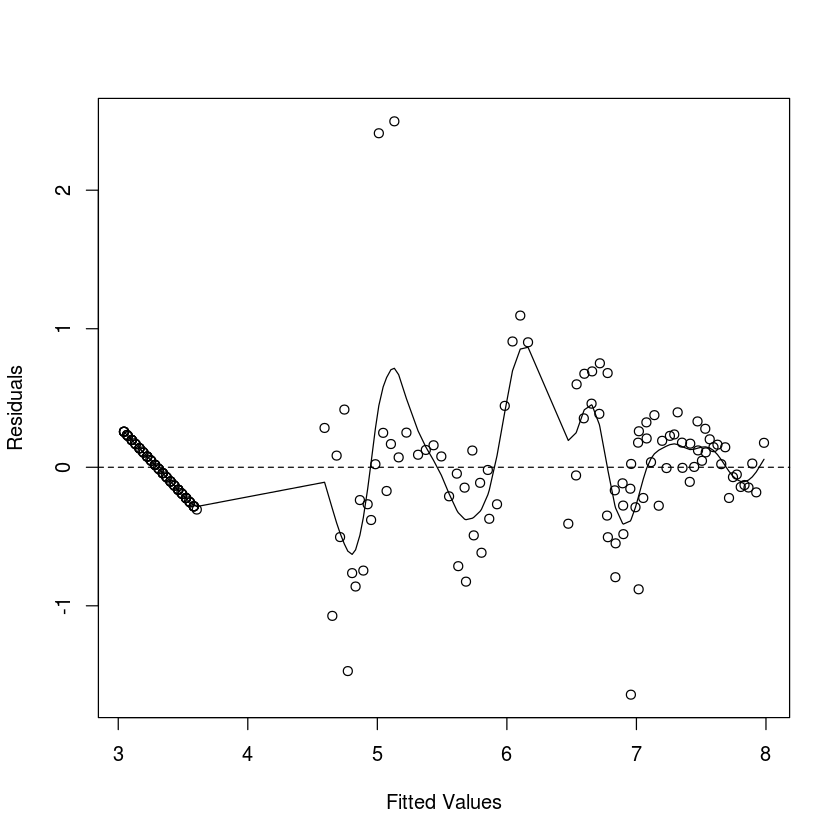

In [14]:
plot(fitted(lmme), residuals(lmme), xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, lty = 2)
lines(smooth.spline(fitted(lmme), residuals(lmme)))

cite:
http://www.sciencedirect.com/science/article/pii/S0169534709000196


http://www.springer.com/us/book/9780387874579
https://link.springer.com/book/10.1007%2Fb98882